<a href="https://colab.research.google.com/github/TrinhBaThinh-257275/BTVN-AI/blob/nopbai/Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#khai bao
from sklearn.model_selection import train_test_split
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Food/

/content/drive/MyDrive/Colab Notebooks/BTVN/Food


In [ ]:
train_data = ImageDataGenerator(rescale = 1./255, shear_range = 0.2 , zoom_range = 0.2, horizontal_flip = True) 

In [ ]:
train=train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 900 images belonging to 3 classes.


In [ ]:
test = train_data.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 108 images belonging to 3 classes.


In [ ]:
train.class_indices
test.class_indices

{'Banh mi': 0, 'Banh tet': 1, 'Banh xeo': 2}

In [ ]:
model=Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,epochs=20,batch_size=128,verbose=1, validation_data=test, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/20
29/29 [==============================] - 213s 7s/step - loss: 4.9957 - accuracy: 0.3867 - val_loss: 1.0777 - val_accuracy: 0.4352
Epoch 2/20
29/29 [==============================] - 21s 741ms/step - loss: 1.1889 - accuracy: 0.4311 - val_loss: 1.0659 - val_accuracy: 0.4815
Epoch 3/20
29/29 [==============================] - 22s 744ms/step - loss: 1.0440 - accuracy: 0.4900 - val_loss: 0.8116 - val_accuracy: 0.6759
Epoch 4/20
29/29 [==============================] - 21s 740ms/step - loss: 1.1318 - accuracy: 0.5767 - val_loss: 0.8558 - val_accuracy: 0.6204
Epoch 5/20
29/29 [==============================] - 21s 728ms/step - loss: 0.8285 - accuracy: 0.6756 - val_loss: 0.6807 - val_accuracy: 0.7222
Epoch 6/20
29/29 [==============================] - 22s 747ms/step - loss: 0.8283 - accuracy: 0.6922 - val_loss: 0.5771 - val_accuracy: 0.7870
Epoch 7/20
29/29 [==============================] - 21s 733ms/step - loss: 0.6972 - accuracy: 0.7144 - val_loss: 0.7420 - val_accuracy: 0.6852
E

In [ ]:
model.save("Food.h5")

In [ ]:
model_CNN=load_model('Food.h5')

1/1 [==============================] - 0s 19ms/step
Bánh Xèo


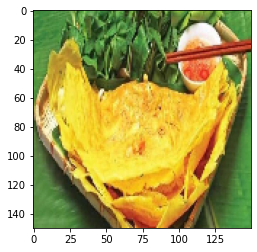

1/1 [==============================] - 0s 19ms/step
Bánh Mì


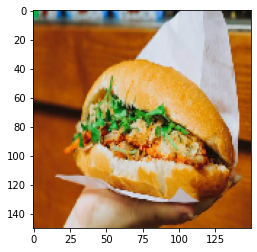

1/1 [==============================] - 0s 16ms/step
Bánh Tét


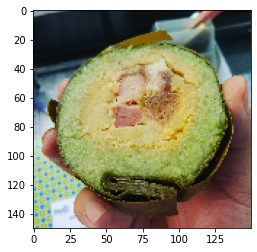

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/BTVN/Food/Test/Test1"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Bánh Mì'
  if round(result[0][1])==1:
    prediction='Bánh Tét'
  if round(result[0][2])==1:
    prediction='Bánh Xèo'
  print(prediction)
  plt.show()